<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/20241008/alphaco_241008jaehyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


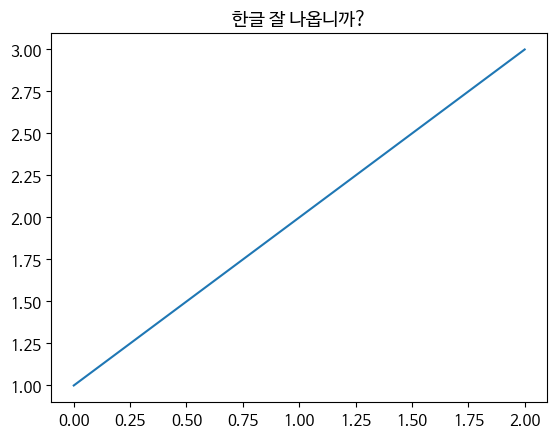

In [4]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# z검정, t 검정


In [6]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


-모수의 표준편차는 9.5로 알고 있음

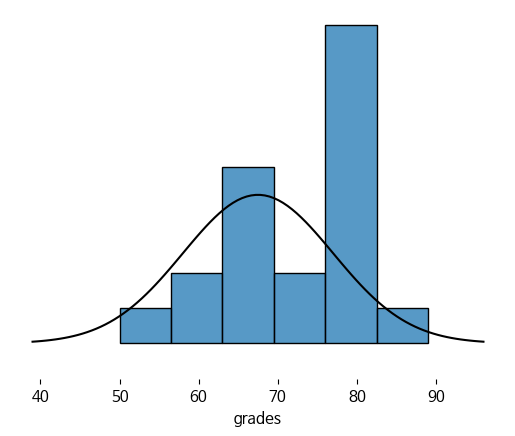

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5 #모수의 평균
sigma = 9.5 #모수의 표준편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

## 가설 수립
- ㅇㅇㅇ라면, ~일거에요. (이런식으로 가설 수립하면 안 돼요!)


- 귀무가설 : 평균의 차이가 없다!
- 대립가설 : 평균의 차이가 있다!


귀무가설
모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!

대립가설
모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다!

## z-score 구하기

In [8]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

2.259605535157681

## p-value


In [9]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

귀무가설(평균 차이 없어!) 기각 ==> 대립가설(평균 차이 있어!) 채택

이렇게 생각하면 편해!


냉정하게 말하면 신뢰도 구간은 95로 할지 뭐로 할지 그냥 연구자 본인이 정하면 됨
표준정규분포표를 통해서 보통은 계산을 하지
95%로 하는 것이 일반적이어서 표준화된 z값으로 1.96 뭐 이렇게 계산 함



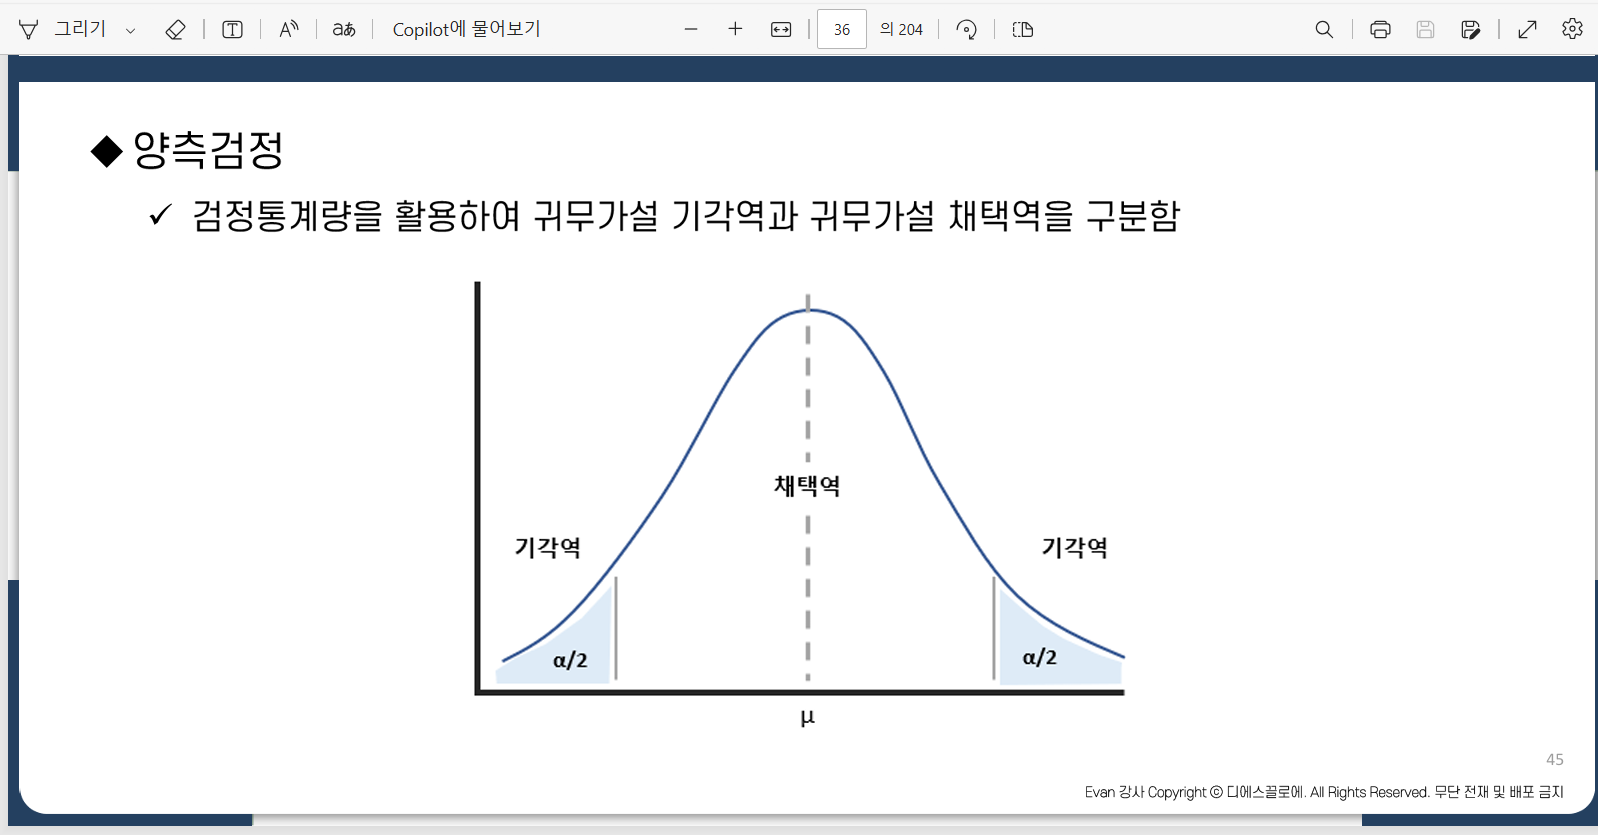

잠깐 쉬었다가 t검정 들어갑니다

# t-검정의 종류

- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test(두 평균의 비교, 독립검정)

## One-Sample t-test (일표본 단일검정)
- 일표본 단일검정
- z-검정과의 차이점
 + 모집단의 표준편차를 모름
 + 모집단의 평균을 알고 있음
 + 자유도 : N-1 (단, z-검정은 N)

 (사실 논리적으로 보면 이상할 수 있음...)

- 모집단의 평균 : 사회적인 통념, 알려진 사실
(ex. 초코칩 과자 중량이 포장지 겉에 45g이라고 적혀 있음,
과거에 우리 회사 제품에 샘플 사이즈는 몇 이었음,
10년 전 남자 평균 키는 x cm였음 등
)

- 가설설정
 + 귀무가설 : 모집단의 평균과 표본의 평균은 같다
   - 오리온 초코칩의 무게중량 45g이 맞을 것이야!

 + 대립가설 : 모집단의 평균과 표본의 평균은 다르다
   - 오리온 초코칩의 무게중량 45g이 아닐거야!










In [10]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a=df['grades'], popmean=67.5)
t,p

#위에 있는 t,p와는 값이 아주 미세하지만 차이가 있을 것입니다.


(2.25471286700693, 0.03614521878144544)

In [11]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a=df['grades'], popmean=71)
t,p
#popmean을 임의로 71로 해서 코드 한 번 돌려볼게요

'''
sample mean은 72.3이니까
단순하게 비교하면 72.3과 71은 다름

샘플 평균과 popmean이 달라 보이지만...
이건 귀무가설 채택의 영역임
왜냐하면 t의 값이 0.61xxxx니까

그래서 지금은 결론을 내릴 수가 없는 상황이에요

조사 중이라고 하고 넘어가야 해...
print(t,p)
'''

'''
분석의 마지막은 결국은 보고서 작성이에요...


'''

print(t,p)

0.6106514014810425 0.5486662606700853


- 신뢰구간 추정
(신뢰구간을 구해서 구간추정하는 것임)


In [12]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
'''
(67.84421513791415, 76.75578486208585) 신뢰구간은 이렇게 나옴

해석하자면...
sample에 따라서 평균보다 높을 수도 있고 낮을 수도 있음



'''

confidence_interval

(67.84421513791415, 76.75578486208585)

In [13]:
ttest_1samp(a=df['grades'], popmean=71).confidence_interval()

# 이렇게 메서드 하나만 서서 간단하게 끝낼 수 있음
#(67.84421513791415, 76.75578486208585) 신뢰구간은 이렇게 나옴
# 같은 수치
# ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

## t-검정 (independent t-test)

- 가정 만족 확인 : 정규성과 등분산성 검정
- 정규성의 가설
  + 귀무가설 : 데이터가 정규분포를 만족한다.
  + 대립가설 : 데이터가 정규분포를 이루고 있지 않다.

- 등분산성 가설
  + 귀무가설 : 두 그룹의 분산이 같다.
  + 대립가설 : 두 그룹의 분산이 다르다.

- t-검정 가설검정



In [14]:
import seaborn as sns
import pandas as pd

tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###시각화
- 독립성 검정을 시행할 수 있는 변수는 총 3개인 것 확인 가능

- 시나리오
  + 성별에 따라서 팁의 액수 평균 차이가 존재할까?
  + 흡연 여부에 따라서 팁의 액수 평균 차이가 존재할까?
  + 시간대에 따라서 팁의 액수 평균 차이가 존재할까?
  

In [15]:
tips['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [16]:
tips['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [17]:
tips['size'].value_counts()

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


- 히스토그램
  + 데이터가 연속형일 때, 숫자일 때 그래프 그려야 함
  + tip을 그립니다.




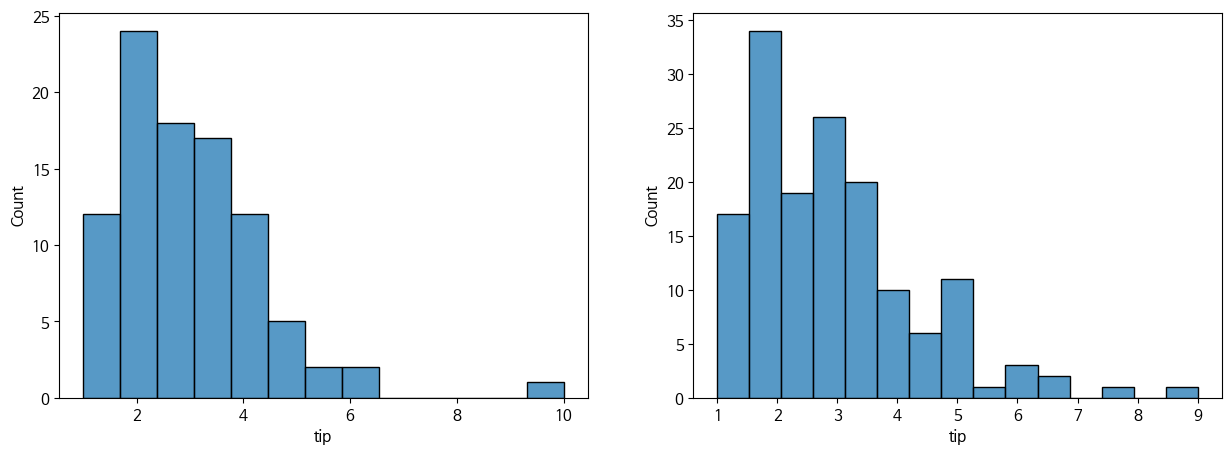

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 분리
smoker_yes = tips.loc[tips['smoker']=='Yes', : ]

smoker_no = tips.loc[tips['smoker']=='No', : ]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))


sns.histplot(smoker_yes['tip'], ax=ax[0])
sns.histplot(smoker_no['tip'], ax=ax[1])

'''
이거 중요함
모양을 보니 정규분포로 치기 어렵다.
하지만 정규분포 30개가 넘어가기 떄문에 사실 상 정규분포로 가정한다.


'''

plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


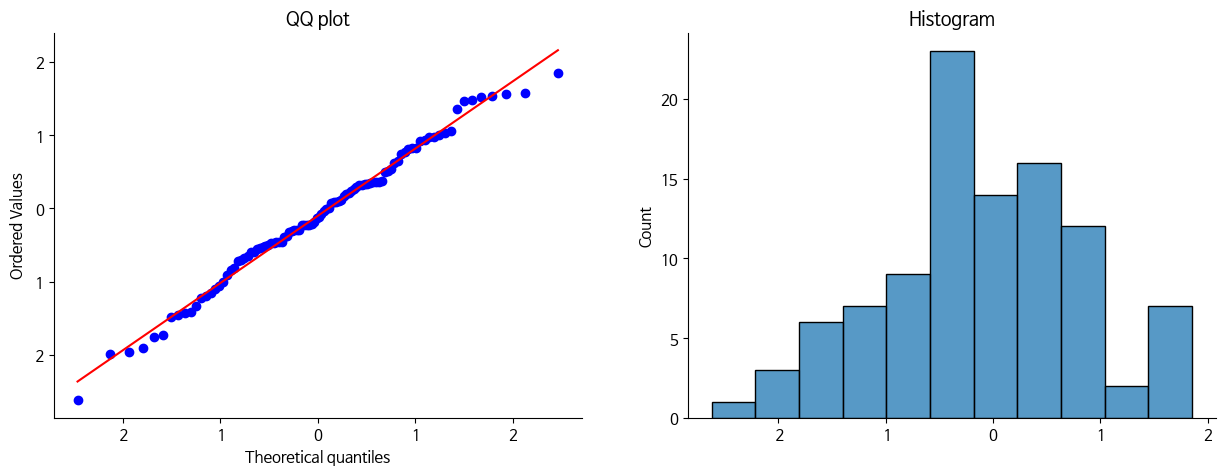

ShapiroResult(statistic=0.9898833815158516, pvalue=0.6551676754214818)

In [19]:
# 정규분포를 이루는 데이터
'''
참고하세요 이게 정규분포를 이루는 데이터입니다
'''
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 샤피로 윌크 검정

- 데이터의 개수가 30개 미만이라는 가정 하에 정규성 검정 시행

(그래서 데이터의 개수가 충분히 많다면 굳이 할 필요는 없음)
(사실 이거 하게 될 경우 거의 없음)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


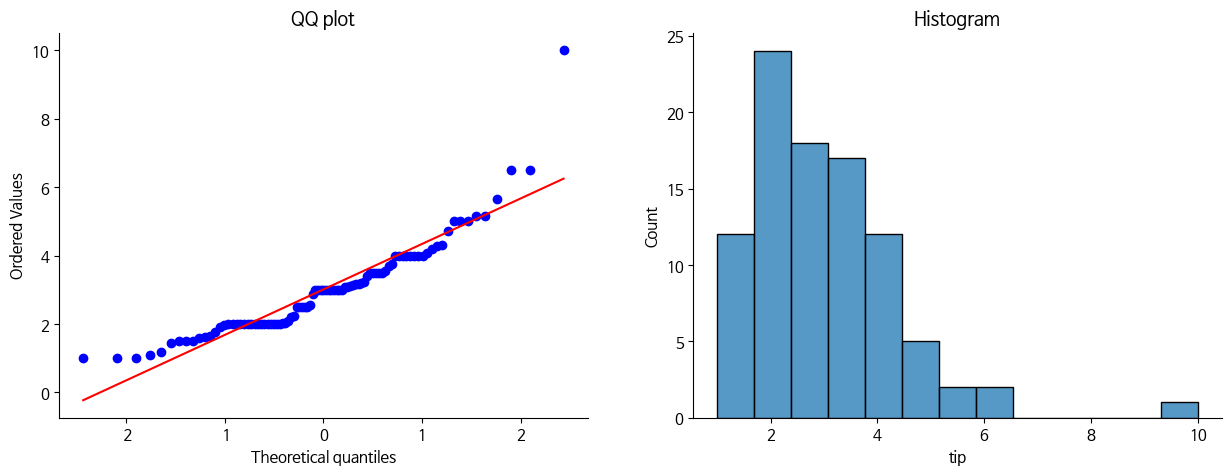

ShapiroResult(statistic=0.8788249661085323, pvalue=3.612564299352561e-07)

In [20]:
# 정규분포를 이루지 못하는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

빨간 기준 선(평균)에 파란 점이 많이 몰려 있어야 좋은 정규 분포임



### 가설설정
  + 귀무가설 : 데이터는 정규분포다
  + 대립가설 : 데이터는 정규분포가 아니다
  

### 등분산성 검정


In [21]:
from scipy import stats
'''
나한테 데이터는 크게 2가지
tips와 흡연 유무



tips
smoker_yes, smoker_no
'''
t,p=stats.levene(smoker_yes['tip'],smoker_no['tip'])
t,p

# 두 그룹의 분산이 같다고 p밸류를 보고 알 수 있음



(0.02051159105706963, 0.8862366542563406)

### 가설 검정

- 귀무가설 : 두 그룹의 평균은 같다
- 대립가설 : 두 그룹의 평균은 다르다

결론 : 귀무가설 채택하고, 두 그룹의 평균은 같다


- 두 그룹의 분산은 같다.

In [22]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.09222805186888201
P-value: 0.9265931522244976


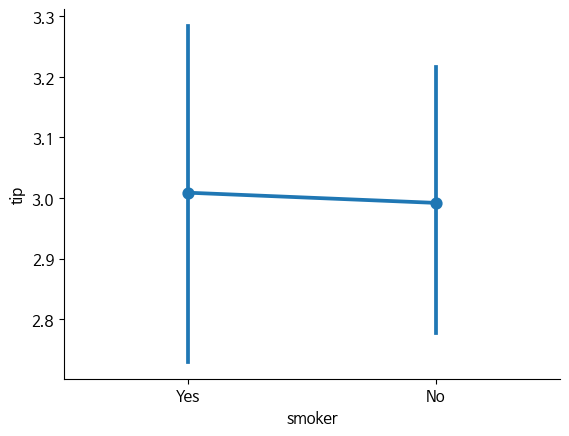

In [23]:
fig, ax = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()

# 이거 분산입니다

# yes가 no보다 분산이 조금 더 넓어보이긴 하네요



### 박스 플롯 시각화
 - 두 그룹의 박스플롯 시각화 결과 확인

 해보면

 진짜로 비슷함

 결론 : 흡연 여부랑 팁을 주는 거랑은 관계가 없다


 (추가적인 상상 결론 : 내가 종업원이라면, 팁을 더 받기 위해 흡연자 혹은 비흡연자에게 더 어필해야 한다 이런거 할 필요 없음)
 왜냐하면 흡연 여부랑 팁 주는 양은 큰 관계가 없으니까

# 20241008 from here
2024 1008 여기서부터 시

#가설 검정 테스트
- one-sample t-test(일표본)
- paired t-test(대응표본)
- independent t-test(독립표본)
- 정규성 검정
- 등분산성 검정

Chat GPT

1. One-Sample T-Test (일표본 t-검정)
귀무가설 표본의 평균이 모집단의 평균과 같다.
대립가설 표본의 평균이 모집단의 평균과 다르다.


2. Paired T-Test (대응표본 t-검정)
귀무가설 : 두 시점(또는 관련된 두 그룹)의 평균이 동일하다.
대립가설 : 두 시점(또는 관련된 두 그룹)의 평균이 다르다.

3. Independent T-Test (독립표본 t-검정)
귀무가설 : 두 그룹의 평균이 동일하다.
대립가설 : 두 그룹의 평균이 다르다.

4. 정규성 검정 (Normality Test)

귀무가설 : 데이터가 정규분포를 따른다.
대립가설 : 데이터가 정규분포를 따르지 않는다.

5. 등분산성 검정 (Homoscedasticity Test)

귀무가설 : 두 그룹의 분산이 동일하다.
대립가 : 두 그룹의 분산이 다르다.

선생님!

단일
모평균과 표본평균은 같다.
같지 않다

대응
실험전후 평균의 차이는 0이다
아니다

독립
그룹1의 평균과 2의 평균은 같다
아니다

정규성
정규분포를 이룬다
아니다

등분산성 검정
분산이 같다
아니다


## t-검정 paired t-test
- 절차
  + 정규성 검정
    + 귀무가설 : 데이터는 정규분포다
    + 대립가설 : 데이터는 정규분포가 아니다
    + 여기서의 데이터는 difference 값을 의미


In [24]:
import pandas as pd
import numpy as np

np.random.seed(42)

exam1_scores = np.random.uniform(50, 100, 20)
exam2_scores = exam1_scores + np.random.normal(0, 10, 20)

df = pd.DataFrame({
    'Student_ID': range(1, 21),
    'Exam1_Score': exam1_scores,
    'Exam2_Score': exam2_scores
})

df['Exam1_Score'] = df['Exam1_Score'].astype('int64')
df['Exam2_Score'] = df['Exam2_Score'].astype('int64')
df['diff'] = df['Exam2_Score'] - df['Exam1_Score']

df.head(1)

,Student_ID,Exam1_Score,Exam2_Score,diff
0,1,68,58,-10


In [25]:
df.shape # (20,4) 이건 데이터가 20개라서 30개 미만이기 때문에 데이터 정규성 검정 필수로 진행해야 함


(20, 4)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


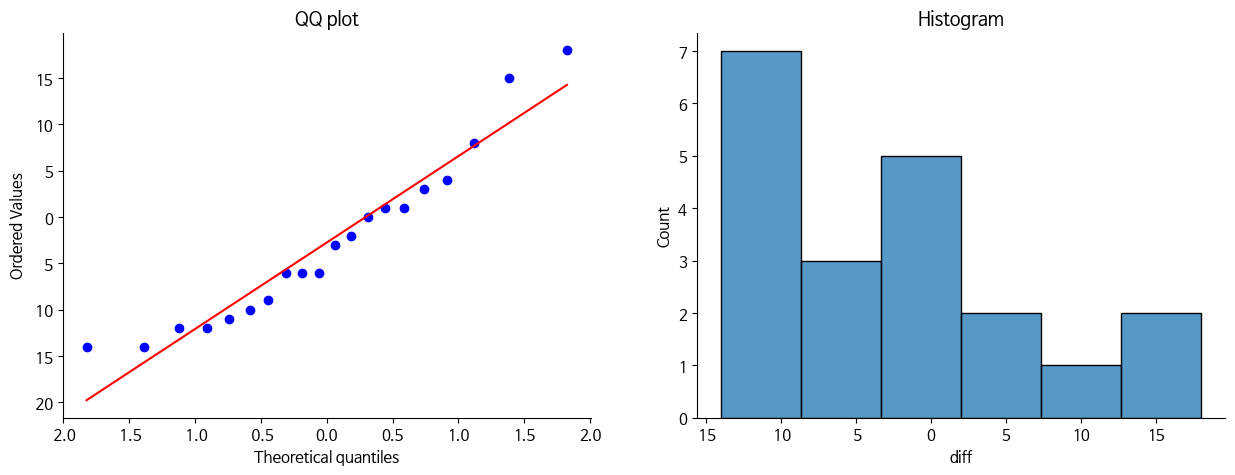

ShapiroResult(statistic=0.9267928086509175, pvalue=0.13394043618879037)

In [26]:
np.random.seed(42)
normal_data = df['diff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

pvalue=0.13394043618879037
귀무가설 채택해야 함 => 정규분포 이루니까

# 가설검정

In [27]:
from scipy import stats

# write code here
t,p=stats.ttest_rel(df['Exam1_Score'], df['Exam2_Score'])
'''
p value 0.19488870621876497 이기 때문에 귀무가설

exam1과 exam2 차이 없다

시험을 2번 봤다는 얘기는 뭔가 첫 번째 시험 보고 특정 교육 방법을 시도해본 후 두 번째 시험 본 것인데,
결과가 크게 다르지 않으니
결론은 새롭게 시도해본 교육 방식은 효과가 없었다! 새로운 교육 방식 망했다!
'''

t,p

(1.343652804294727, 0.19488870621876497)

분산분석

분산분석은 오늘 하루로 진도 못 끝냄

분산분석은 하다 보면 회귀분석과 크게 차이가 없음
겉으로 봤을 때는 t-test와 비슷하다고 생각할 수도 있지만
엄밀하게 말하면 내부적 알고리즘, 형태, 식을 전체적으로 유도하는 과정 등 유형은 결국 회귀분석임

나중에 파이썬 모듈 몇 가지 소개할텐데, 회귀분석이라는 이름으로 들어감

나중에 따로 공부할 때 분산분석 챕터만 보고, 분산분석을 설명하는데 회귀분석 언급이 없으면 그 책은 그냥 걸러도 됨



# 분산분석

In [28]:
import seaborn as sns

tips=sns.load_dataset("tips")

#tips['size'].value_counts()
'''
일단 금요일은 19개라서 20개가 안 되어서 제외하고
	count
day
Sat	87
Sun	76
Thur	62
Fri	19


토, 일, 목 3가지를 평균 비교 하고 싶어요

3개의 평균 비교를 진행하고 싶을 때 이럴 때 분산분석을 사용합니다.
만약에 2개 평균 비교할거면 그냥 t-test 진행하면 돼

3그룹 이상일 때에는 분산분석으로 진행하세요
'''

tips['day'].value_counts()



,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


scipy가 statsmodels에 영향을 주었고
scipy와 statsmodels가 pingouin에 영향을 줌



scipy, statsmodels
지금까지 이것들 써왔는데...
- 빅데이터 실기 자격증







프로젝트 진행 시에는
pingouin  라이브러리 사용을 추천합니다.
이유
 : 함수가 직관적임
 : 결괏갓ㅂ이 pandas dataframe으로 나와서, 바로 리포트 보고서 작성 시 용이함 ==> 보고용으로 적합



## pingouin

In [29]:
!pip install pingouin -qq
#-qq라고 하면 실행 내역은 더럽게 출력하지 않음

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.3 MB/s eta 0:00:00


In [30]:
import pingouin as pg
'''
ModuleNotFoundError

구글 코랩에서 지원 안 해서 따로 항상 설치해주어야 해
'''

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

#등분산성 검정
# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')



,W,pval,equal_var
levene,0.392743,0.760016,True


In [31]:
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [32]:
# 2. If the groups have equal variances, we can use a regular one-way ANOVA
#분산 분석을 실행함
pg.anova(data=df, dv='Pain threshold', between='Hair color')


,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


p가 0.004114라서 귀무가설을 기각해야 해요


In [33]:
# 3. If there is a main effect, we can proceed to post-hoc Tukey test
'''
결과를 보면
t-test가 쉽게 말해서
6번 사용되었다고 보면 됨

'''
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074068,1.413596
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.435577,-0.810661
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.414728,0.982361
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003708,-2.336811
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.789321,-0.626769
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036647,2.015280


이제 실습해봅시다

tips 데이터를 이용해서
tip, day에 따른 차이가 있느냐?

차이가 존재한다면 어느 요일에 가장 tip이 많느냐

==> 이것으로 낼 수 있는 결론 : 우리는 종업원이니까 해당 요일에만 특별하게 손님에게 친절하게 대하면 된다ㅎㅎ


In [34]:
'''
import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')

# 2. If the groups have equal variances, we can use a regular one-way ANOVA
pg.anova(data=df, dv='Pain threshold', between='Hair color')

# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')
'''

tips=sns.load_dataset("tips")

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [35]:
'''
아까 금요일 개수 19개인가 그래서 개수가 충분하지 않아서 금요일 제외하기로 했었음ㅎㅎ
기억나지?
기억 안 나면 전체 필사 꼭 해보세요
'''

tips=tips.loc[tips['day'].isin(['Sat','Sun','Thur']), :].reset_index(drop=True)
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,0


In [36]:
pg.homoscedasticity(data=tips, dv='tip', group='day')
#pg.anova(data=tips, dv='tip', between='day')
#pg.pairwise_tukey(data=tips, dv='tip', between='day')

,W,pval,equal_var
levene,0.452896,0.63637,True


In [37]:
#분산분석
pg.anova(data=tips, dv='tip', between='day')

#pg.pairwise_tukey(data=tips, dv='tip', between='day')
# 0.130364 이렇게 나와서 평균차이가 없다고 보면 됨. 사후 검정 필요 없음


,Source,ddof1,ddof2,F,p-unc,np2
0,day,2,222,2.056236,0.130364,0.018188


In [38]:
pg.pairwise_tukey(data=tips, dv='tip', between='day')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Thur,Sat,2.771452,2.993103,-0.221652,0.233179,-0.950565,0.608894,-0.148857
1,Thur,Sun,2.771452,3.255132,-0.483680,0.240098,-2.014510,0.111077,-0.388762
2,Sat,Sun,2.993103,3.255132,-0.262028,0.220282,-1.189512,0.460663,-0.178644


목토 평균차이 없고
목일 평균 차이 없고
토일 평균 차이 없고

등분산성 검정 시작하면
tip과 size 기준으로 등분산성 검정 시작하면
equal_var이 false가 나옴

즉 tip과 size는 등분산성 검정 통과 못 함
이제 당황하지 말고 다른 메소드로 진행하면 돼
이제 anova말고 다른 메소드로 진행하면 돼


## statsmodels


In [39]:
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

f_stat, p_value = f_oneway(df[df['Hair color'] == 'Light Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Blond']['Pain threshold'],
                 df[df['Hair color'] == 'Light Brunette']['Pain threshold'],
                 df[df['Hair color'] == 'Dark Brunette']['Pain threshold'])
print('F-Statistic:', f_stat, 'P-value:', p_value)

F-Statistic: 6.791407046264097 P-value: 0.004114227333077399


In [40]:
model = ols('Q("Pain threshold") ~ C(Q("Hair color"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq    df         F    PR(>F)
C(Q("Hair color"))  1360.726316   3.0  6.791407  0.004114
Residual            1001.800000  15.0       NaN       NaN


In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

tukey_results = pairwise_tukeyhsd(endog=df['Pain threshold'],    # Data
                                  groups=df['Hair color'],      # Groups
                                  alpha=0.05)                   # Significance level

# Print results
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0741 -28.6967  1.0967  False
   Dark Blond    Light Blond      8.0 0.4356  -6.8967 22.8967  False
   Dark Blond Light Brunette     -8.7 0.4147 -24.5004  7.1004  False
Dark Brunette    Light Blond     21.8 0.0037   6.9033 36.6967   True
Dark Brunette Light Brunette      5.1 0.7893 -10.7004 20.9004  False
  Light Blond Light Brunette    -16.7 0.0366 -32.5004 -0.8996   True
--------------------------------------------------------------------


#분산분석
- 가설 설정
  + 귀무가설 : day 컬럼의 평균 tip 차이가 없다
  + 대립가설 : day 컬럼의 평균 tip 차이가 있다
- 귀무가설 채택 시 (p.value >= 0.5), 사후 검정은 진행할 필요 없음
- 귀무가설 기각 시 ==> 대립가설 채택, 사후 검정을 진행해주세요
  + 해석은 두 평균의 비교 검정하는 방법 대로 진행 후 결과 해석


이것이 분산 분석의 프로세스

In [42]:
import pingouin as pg

df = pg.read_dataset('anova')

# 등분산성 검정
pg.homoscedasticity(data=tips, dv='tip', group='size')

pg.welch_anova(data=tips, dv='tip', between='size')

result = pg.pairwise_gameshowell(data=tips, dv='tip', between='size')
result['가설검정결과'] = result['pval'].apply(lambda p : '귀무가설 기각' if p < 0.05 else '귀무가설 채택')
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,가설검정결과
0,1,2,1.276667,2.575214,-1.298548,0.289075,-4.492084,2.383363,0.126465,-1.310048,귀무가설 채택
1,1,3,1.276667,3.403784,-2.127117,0.379203,-5.609435,6.767928,0.007325,-1.354430,귀무가설 기각
2,1,4,1.276667,4.118889,-2.842222,0.391362,-7.262382,7.574227,0.001029,-1.719560,귀무가설 기각
3,1,5,1.276667,4.028000,-2.751333,0.700948,-3.925159,5.254649,0.063720,-1.980588,귀무가설 채택
4,1,6,1.276667,5.225000,-3.948333,0.594841,-6.637625,4.383792,0.011909,-3.820594,귀무가설 기각
5,2,3,2.575214,3.403784,-0.828569,0.272526,-3.040330,43.784116,0.043093,-0.725690,귀무가설 기각
6,2,4,2.575214,4.118889,-1.543675,0.289205,-5.337644,41.619021,0.000051,-1.327819,귀무가설 기각
7,2,5,2.575214,4.028000,-1.452786,0.649464,-2.236899,4.136502,0.376356,-1.435651,귀무가설 채택
8,2,6,2.575214,5.225000,-2.649786,0.533209,-4.969511,3.153770,0.065643,-2.655180,귀무가설 채택
9,3,4,3.403784,4.118889,-0.715105,0.379303,-1.885314,70.557258,0.419616,-0.436994,귀무가설 채택


In [43]:
import pingouin as pg

df = pg.read_dataset('anova')

# 등분산성 검정
pg.homoscedasticity(data=tips, dv='tip', group='size')

pg.welch_anova(data=tips, dv='tip', between='size')

result = pg.pairwise_gameshowell(data=tips, dv='tip', between='size')
result['가설검정결과'] = result['pval'].apply(lambda p : '귀무가설 기각' if p < 0.05 else '귀무가설 채택')
result

# 스타일링 함수 정의
def color_hypothesis(val):
    color = 'red' if val == '귀무가설 기각' else 'blue'
    return f'color: {color}'

# 데이터프레임 시각화
styled_result = result.style.applymap(color_hypothesis, subset=['가설검정결과'])
styled_result

<ipython-input-43-be653446e13a>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_result = result.style.applymap(color_hypothesis, subset=['가설검정결과'])


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,가설검정결과
0,1,2,1.276667,2.575214,-1.298548,0.289075,-4.492084,2.383363,0.126465,-1.310048,귀무가설 채택
1,1,3,1.276667,3.403784,-2.127117,0.379203,-5.609435,6.767928,0.007325,-1.354430,귀무가설 기각
2,1,4,1.276667,4.118889,-2.842222,0.391362,-7.262382,7.574227,0.001029,-1.719560,귀무가설 기각
3,1,5,1.276667,4.028000,-2.751333,0.700948,-3.925159,5.254649,0.063720,-1.980588,귀무가설 채택
4,1,6,1.276667,5.225000,-3.948333,0.594841,-6.637625,4.383792,0.011909,-3.820594,귀무가설 기각
5,2,3,2.575214,3.403784,-0.828569,0.272526,-3.040330,43.784116,0.043093,-0.725690,귀무가설 기각
6,2,4,2.575214,4.118889,-1.543675,0.289205,-5.337644,41.619021,0.000051,-1.327819,귀무가설 기각
7,2,5,2.575214,4.028000,-1.452786,0.649464,-2.236899,4.136502,0.376356,-1.435651,귀무가설 채택
8,2,6,2.575214,5.225000,-2.649786,0.533209,-4.969511,3.153770,0.065643,-2.655180,귀무가설 채택
9,3,4,3.403784,4.118889,-0.715105,0.379303,-1.885314,70.557258,0.419616,-0.436994,귀무가설 채택


In [44]:
import pingouin as pg

df = pg.read_dataset('anova')

# 등분산성 검정
pg.homoscedasticity(data=tips, dv='tip', group='size')

pg.welch_anova(data=tips, dv='tip', between='size')

result = pg.pairwise_gameshowell(data=tips, dv='tip', between='size')
result['가설검정결과'] = result['pval'].apply(lambda p : '귀무가설 기각' if p < 0.05 else '귀무가설 채택')


def highlight_reject(s):
    color = 'background-color: lightcoral' if s['가설검정결과'] == '귀무가설 기각' else ''
    return [color] * len(s)

# Apply the highlighting function
styled_results = result.style.apply(highlight_reject, axis=1)
styled_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,가설검정결과
0,1,2,1.276667,2.575214,-1.298548,0.289075,-4.492084,2.383363,0.126465,-1.310048,귀무가설 채택
1,1,3,1.276667,3.403784,-2.127117,0.379203,-5.609435,6.767928,0.007325,-1.354430,귀무가설 기각
2,1,4,1.276667,4.118889,-2.842222,0.391362,-7.262382,7.574227,0.001029,-1.719560,귀무가설 기각
3,1,5,1.276667,4.028000,-2.751333,0.700948,-3.925159,5.254649,0.063720,-1.980588,귀무가설 채택
4,1,6,1.276667,5.225000,-3.948333,0.594841,-6.637625,4.383792,0.011909,-3.820594,귀무가설 기각
5,2,3,2.575214,3.403784,-0.828569,0.272526,-3.040330,43.784116,0.043093,-0.725690,귀무가설 기각
6,2,4,2.575214,4.118889,-1.543675,0.289205,-5.337644,41.619021,0.000051,-1.327819,귀무가설 기각
7,2,5,2.575214,4.028000,-1.452786,0.649464,-2.236899,4.136502,0.376356,-1.435651,귀무가설 채택
8,2,6,2.575214,5.225000,-2.649786,0.533209,-4.969511,3.153770,0.065643,-2.655180,귀무가설 채택
9,3,4,3.403784,4.118889,-0.715105,0.379303,-1.885314,70.557258,0.419616,-0.436994,귀무가설 채택


t-test, 분산분석 ==> 그룹간 ㅇㅇ 비교

상관분석, 회귀분석 ==> 변수 간의 관계를 알아보겠다!


상관분석

In [46]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


공분산 구하기

In [47]:
df = iris.loc[:9, ['sepal_width', 'petal_length']]
sepal_w_mean = df['sepal_width'].mean()
petal_l_mean = df['petal_length'].mean()
sepal_w_mean, petal_l_mean

(3.31, 1.45)

In [48]:
df['sepal_diff'] = df['sepal_width'] - sepal_w_mean
df['petal_diff'] = df['petal_length'] - petal_l_mean
df['multiple'] = df['sepal_diff'] * df['petal_diff']
print("편차의 합:", df['multiple'].sum())
print("공분산 :", df['multiple'].sum()/(len(df)))

편차의 합: 0.15499999999999994
공분산 : 0.015499999999999995


In [49]:
df.cov(ddof=0)

,sepal_width,petal_length,sepal_diff,petal_diff,multiple
sepal_width,0.08490,0.01550,0.08490,0.01550,0.007040
petal_length,0.01550,0.01050,0.01550,0.01050,0.003320
sepal_diff,0.08490,0.01550,0.08490,0.01550,0.007040
petal_diff,0.01550,0.01050,0.01550,0.01050,0.003320
multiple,0.00704,0.00332,0.00704,0.00332,0.002085


In [51]:
iris.iloc[:,:4].cov(ddof=0)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.681122,-0.042151,1.265820,0.512829
sepal_width,-0.042151,0.188713,-0.327459,-0.120828
petal_length,1.265820,-0.327459,3.095503,1.286972
petal_width,0.512829,-0.120828,1.286972,0.577133


## 상관계수 구하기

In [52]:
iris.iloc[:,:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


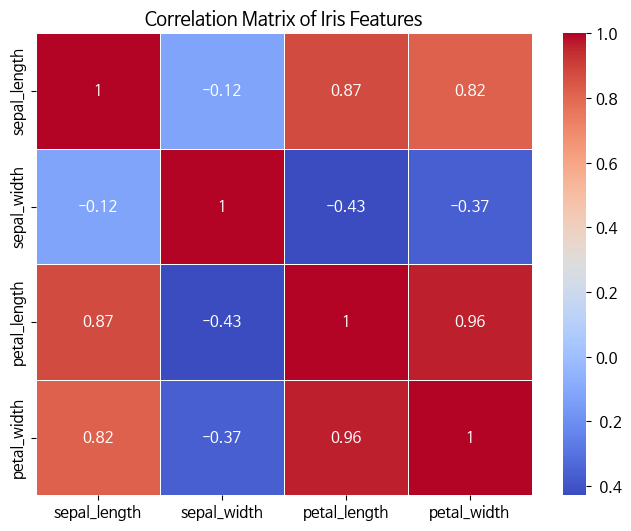

In [54]:
# 첫 4개의 열에 대한 상관계수 계산
corr_matrix = iris.iloc[:, :4].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

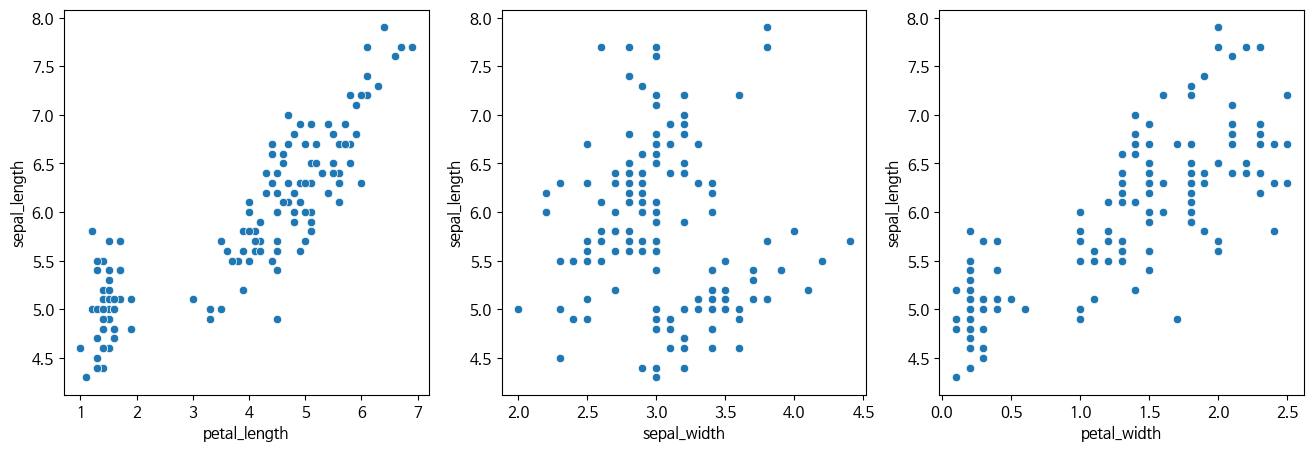

In [57]:
#산점도 구하기
fig,ax=plt.subplots(ncols=3, figsize=(16,5))
sns.scatterplot(iris, x='petal_length', y='sepal_length', ax=ax[0])
sns.scatterplot(iris, x='sepal_width', y='sepal_length', ax=ax[1])
sns.scatterplot(iris, x='petal_width', y='sepal_length', ax=ax[2])
plt.show()

해당 산점도를 확인하고 나면
이제 기울기가 보여야 함...

명확하게 기울기가 그려지는지 아닌지가 포인트

In [58]:
df['sepal_diff'] = df['sepal_width'] - sepal_w_mean
df['petal_diff'] = df['petal_length'] - petal_l_mean
df['multiple'] = df['sepal_diff'] * df['petal_diff']
df['sepal_squared'] = df['sepal_diff'] ** 2
df['petal_squared'] = df['petal_diff'] ** 2

cov_value = df['multiple'].sum()/(len(df))
sepal_squared_std = np.sqrt(np.mean(df['sepal_squared']))
petal_squared_std = np.sqrt(np.mean(df['petal_squared']))
print("편차의 합:", df['multiple'].sum())
print("공분산 :", cov_value)
print("sepal_squared 표준편차:", sepal_squared_std)
print("petal_squared 표준편차:", petal_squared_std)
print("상관계수:", cov_value / (sepal_squared_std * petal_squared_std))

편차의 합: 0.15499999999999994
공분산 : 0.015499999999999995
sepal_squared 표준편차: 0.2913760456866693
petal_squared 표준편차: 0.10246950765959598
상관계수: 0.5191384588617989


단순선형회귀
- 가정을 만족하지 못 했다고 판단 ==> 주어진 시각화 분포를 보고 정의를 내리고 나서, 그에 맞는 회귀식을 별도로 공부 시작

기울기가 존재한다?

=> means  that => 관계가 있다. 예측을 할 수 있다. 독립변수(x)가 종속변수(y)에 유의미한 영향을 준다



오후 3시 12분~

# 회귀분석

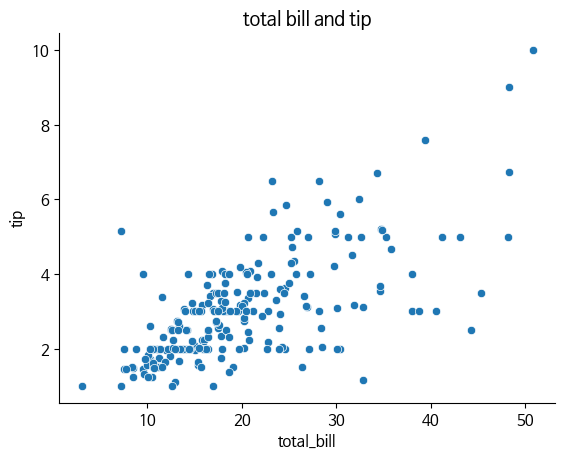

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.scatterplot(data = tips,
                x = 'total_bill',
                y = 'tip')
ax.set(title = 'total bill and tip', ylabel = 'tip', xlabel='total_bill')
sns.despine()

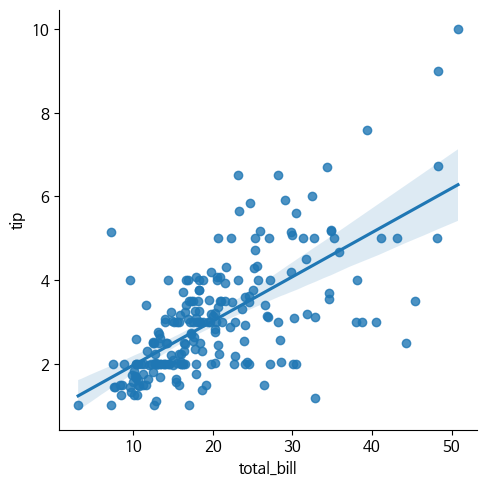

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.lmplot(data = tips,
                x = 'total_bill',
                y = 'tip')
sns.despine()

모델 만들기


In [65]:
import statsmodels.api as sm

X = tips['total_bill']
y = tips['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.02e-30
Time:                        06:20:00   Log-Likelihood:                -328.88
No. Observations:                 225   AIC:                             661.8
Df Residuals:                     223   BIC:                             668.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9042      0.172      5.264      0.0

In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


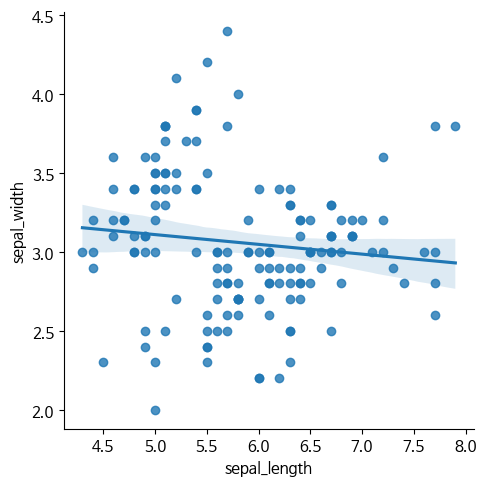

In [63]:
sns.lmplot(data = iris,
                x = 'sepal_length',
                y = 'sepal_width')
sns.despine()

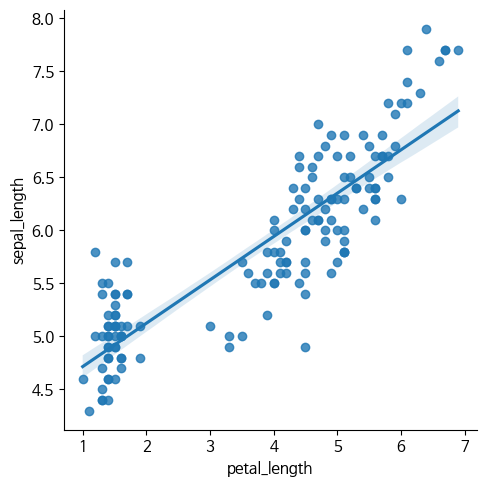

In [64]:
sns.lmplot(data = iris,
                x = 'petal_length',
                y = 'sepal_length')
sns.despine()

# 회귀식 가정 검토


잔차의 정규성
- 귀무가설 : 주어진 데이터는 정규분포를 이룬다
- 대립가설 : 주어진 데이터는 정규분포를 이루고 있지 않다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


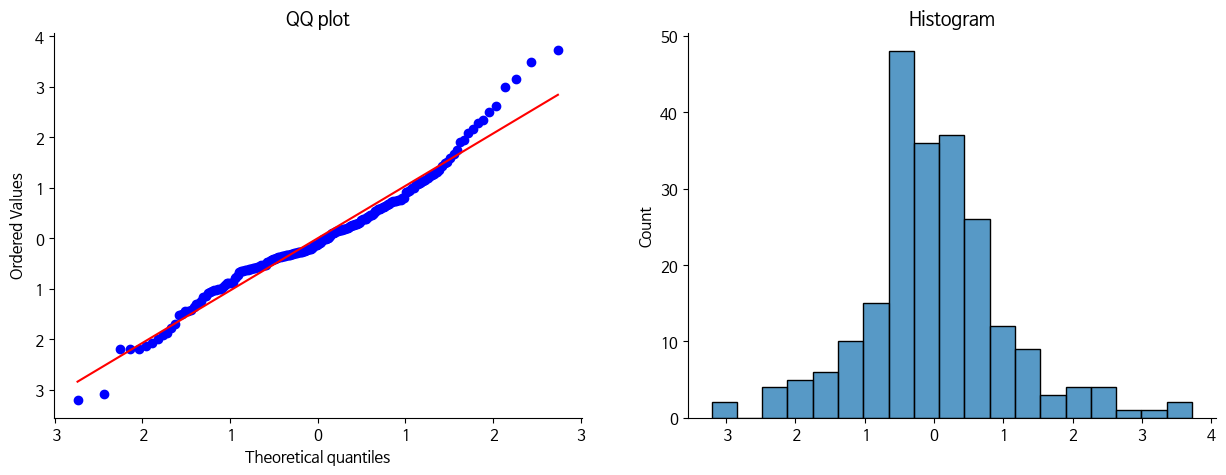

ShapiroResult(statistic=0.9689880696275982, pvalue=7.735569496094148e-05)

In [66]:
from scipy import stats
from scipy.stats import probplot

res = model.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(res, dist="norm", plot = axes[0]);
sns.histplot(res, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(res)

### 잔차의 등분산성
- 등분산성이 아니라면
  + 종속변수의 이상치 제거
  + 변수의 로그 변환

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


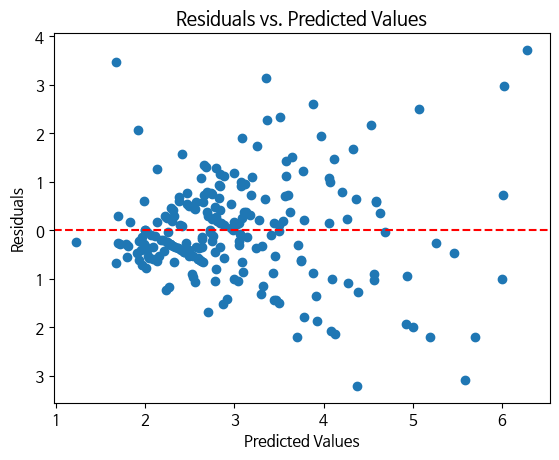

Levenes Test p-value: 8.829049396018508e-06


[('Lagrange multiplier statistic', 57.93913495051581),
 ('p-value', 2.622265748769753e-13),
 ('f-value', 38.49641253564857),
 ('f p-value', 4.434402002120459e-15)]

In [72]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

X = tips['total_bill']
y = tips['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optionally, use Levene's test to statistically test homoscedasticity
stat, p = levene(y, predictions)
print('Levenes Test p-value:', p)

#The test
white_test = het_white(model.resid,  model.model.exog)

#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

iris 데이터에 적용

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


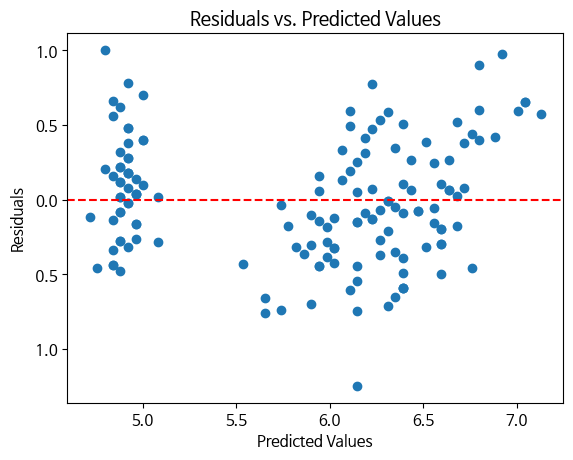

Levenes Test p-value: 0.15373008919712283


[('Lagrange multiplier statistic', 4.127348927907843),
 ('p-value', 0.1269865042454616),
 ('f-value', 2.0796231779684486),
 ('f p-value', 0.12863890476694825)]

In [77]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

X = iris['petal_length']
y = iris['sepal_length']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optionally, use Levene's test to statistically test homoscedasticity
stat, p = levene(y, predictions)
print('Levenes Test p-value:', p)

#The test
white_test = het_white(model.resid,  model.model.exog)

#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

로그변환

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


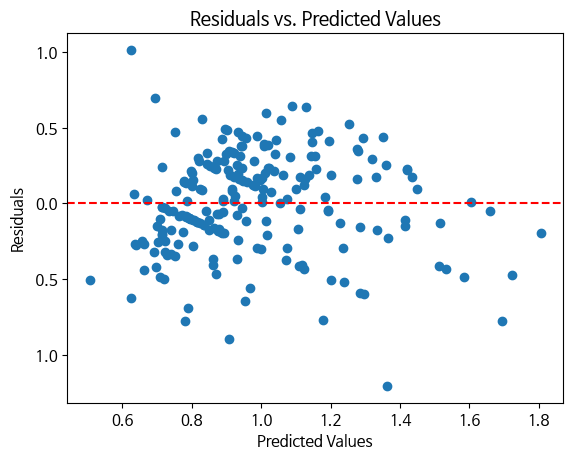

[('Lagrange multiplier statistic', 4.44302129158871),
 ('p-value', 0.10844516279485109),
 ('f-value', 2.2365215678478467),
 ('f p-value', 0.10930927251147539)]

In [78]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import numpy as np

Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_tips_sample = tips[(tips['tip'] >= lower_bound) & (tips['tip'] <= upper_bound)]

X = filtered_tips_sample['total_bill']
y = np.log(filtered_tips_sample['tip'])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

white_test = het_white(model.resid,  model.model.exog)
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names, white_test)

모델을 개선하였습니다ㅎㅎ
p-value', 0.10930927251147539
이상치 제거를 함으로써

## 다중선형회귀

In [79]:
import statsmodels.formula.api as smf

          # 종속변수     # 독립변수     독립변수
formula = "sepal_length ~ sepal_width + petal_length"
model = smf.ols(formula, data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     386.4
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.93e-59
Time:                        06:43:00   Log-Likelihood:                -46.513
No. Observations:                 150   AIC:                             99.03
Df Residuals:                     147   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2491      0.248      9.070   

범주형 회귀분석 설명 : https://dschloe.github.io/python/2024/01/statsmodels_category_variable_regression/
dschloe.github.iodschloe.github.io
statsmodels를 활용한 회귀분석 (feat. 범주형 데이터)
개요 statsmodels를 활용하여 범주형 데이터가 포함된 회귀식을 산정해본다. 범주형 데이터의 특정 값을 변동하는 방법을 배운다. 더불어서 R로 간단한 회귀식도 만들어보자! 강의소개 인프런에서 Streamlit 관련 강의를 진행하고 있습니다. 인프런 : https://inf.run/YPniH 라이브러리 확인 statsmodels의 라이브러리는 현재 0.14.1 버전이다. 라이브러리 참조 : https://www.statsmodels.org/stable/index.html import statsmodels import seaborn as sns import pandas as pd print(statsmodels.__version__) print(sns.__version__) print(pd.__version__) 0.14.1 0.12.2 1.5.3 데이터 불러오기 seaborn에서 tips 데이터를 불러온다. tips = sns.load_dataset('tips') tips.head() 회귀모형 적합 및 확인 (첫번째 방식) - 이제 회귀모형을 적합해본다.
1월 12일

독립성 검정 ==> 카이제곱 검정(이 순서로 하면 헷갈렼)
적합도 검정 ==> 카이제곱 검정(이렇게 해도 헷갈려)


카이제곱 검정이라는게 있는데 적합도와 독립성 두 가지 종류가 있다는 식의 접근이 좋아



카이제곱 검정
- 적합도 검정 : 분포와 관련이 있음
- 독립성 검정 :

카이제곱 검정

In [80]:
import seaborn as sns

tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


관측값

- day 관측값을 구하자

In [81]:
관측값=tips['day'].value_counts().sort_index()
관측값

,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


## 기대값

In [84]:
#len(tips) #244

# 기대값은 244/4 => 61입니다

기대값=len(tips)/len(관측값)
기대값

#[61.0, 61.0, 61.0, 61.0] 이렇게 쓰면 멋이 없잖아ㅋㅋ


61.0

In [87]:
[len(tips)/len(관측값)]

[61.0]

In [88]:
[len(tips)/len(관측값)] * 4

[61.0, 61.0, 61.0, 61.0]

In [86]:
기대값들=[len(tips)/len(관측값)] * len(관측값)
기대값들

[61.0, 61.0, 61.0, 61.0]

In [91]:
#적합도 검정 수행
from scipy import stats
x,p=stats.chisquare(f_obs=관측값, f_exp=기대값들)
x,p #(43.70491803278689, 1.7434891890557614e-09)

(43.70491803278689, 1.7434891890557614e-09)

In [92]:
if p>=0.5:
    print("귀무가설 채택 : 관측된 데이터는 기대값 균등분포와 일치한다")
else:
    print("귀무가설 기각 : 관측된 데이터는 기대값 균등분포와 일치하지 않는다")

귀무가설 기각 : 관측된 데이터는 기대값 균등분포와 일치하지 않는다


# 독립성 검정
- 성별과 흡연 여부
  + 성별에 따라서 흡연 서로 상관이 있느냐?
  

In [96]:
# 교차표 생성
c_table = pd.crosstab(tips['sex'], tips['smoker'])
c_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [98]:
x, p, dof, expected = stats.chi2_contingency(c_table)
print(f"Chi-square Statistic: {x}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


p값이 1이 나왔다는 얘기는 성별과 흡연은 서로 연관성이 없다는 이야기

공통 스터디 : 기초 통계

ML or 추천 or 시계열

